In [1]:
import os
os.environ["VRE_LOGLEVEL"] = "0"
from vre.readers import MultiTaskDataset
from vre.representations import build_representations_from_cfg, Representation
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from vre_data_analysis import (extract_b64_image_from_fig, histogram_from_classification_task, save_html,
                               extract_pil_from_b64_image, extract_b64_imgsrc_from_fig, gaussian_from_statistics)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
data_path = "../semantic_mapper/data"
cfg_path = "../semantic_mapper/cfg.yaml"

In [3]:
representations = build_representations_from_cfg(cfg_path)
print(representations)
reader = MultiTaskDataset(data_path, task_names=list(representations), task_types=representations,
                          normalization="min_max")
print(reader)
print(reader[0])

[2024-11-24T13:24:30 VRE-INFO] Building 'depth/marigold' (vre name: depth_marigold) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_coco_47429163_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_mapillary_49189528_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Building 'optical-flow/rife' (vre name: opticalflow_rife) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Building 'default/rgb' (vre name: rgb) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Building 'normals/depth-svd' (vre name: normals_svd(depth_marigold)) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T13:24:31 VRE-INFO] Tasks used 

{'depth_marigold': Marigold(depth_marigold), 'semantic_mask2former_coco_47429163_0': Mask2Former(semantic_mask2former_coco_47429163_0), 'semantic_mask2former_mapillary_49189528_0': Mask2Former(semantic_mask2former_mapillary_49189528_0), 'opticalflow_rife': FlowRife(opticalflow_rife), 'rgb': RGB(rgb), 'normals_svd(depth_marigold)': DepthNormalsSVD(normals_svd(depth_marigold) ['depth_marigold'])}
[MultiTaskDataset]
 - Path: '/home/mihai/code/ml/video-representations-extractor/examples/vre_data_analysis/../semantic_mapper/data'
 - Tasks (6): [Marigold(depth_marigold ['depth_marigold']), DepthNormalsSVD(normals_svd(depth_marigold) ['normals_svd(depth_marigold)']), FlowRife(opticalflow_rife ['opticalflow_rife']), RGB(rgb ['rgb']), Mask2Former(semantic_mask2former_coco_47429163_0 ['semantic_mask2former_coco_47429163_0']), Mask2Former(semantic_mask2former_mapillary_49189528_0 ['semantic_mask2former_mapillary_49189528_0'])]
 - Classification tasks (2): [Mask2Former(semantic_mask2former_coco_47

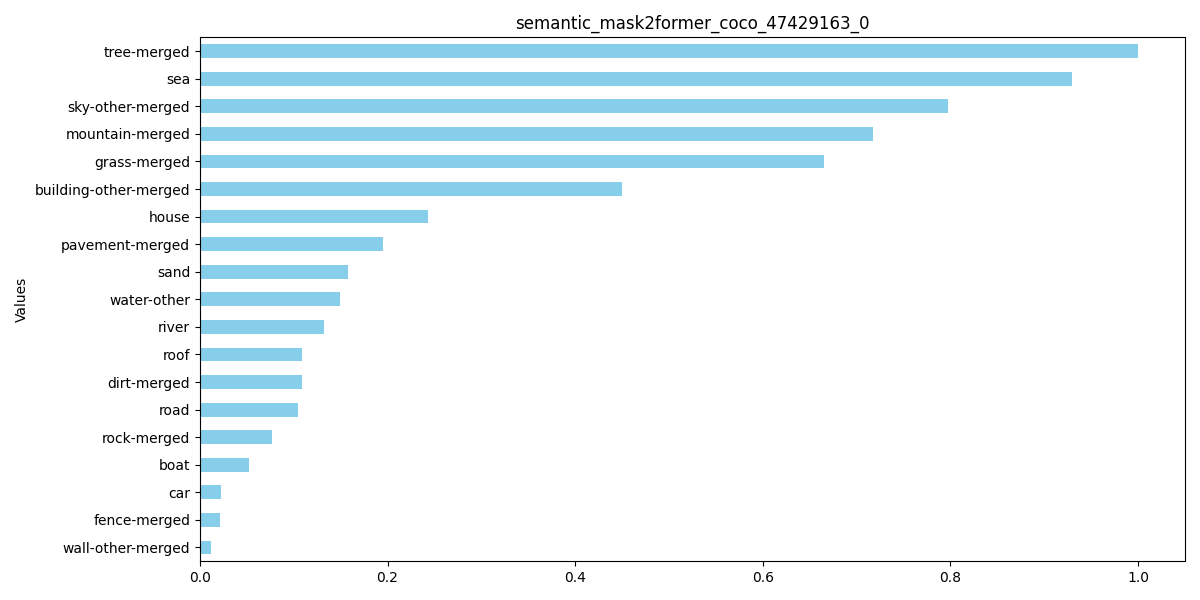

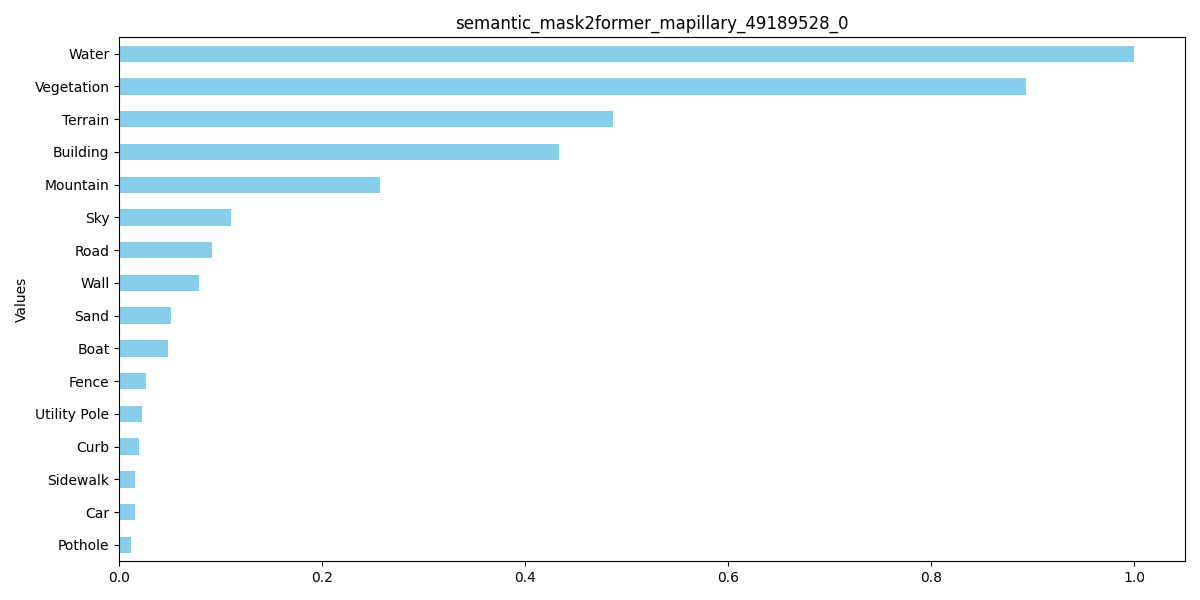

In [4]:
imgsrcs = []
for classif_task in reader.classification_tasks:
    fig = histogram_from_classification_task(reader, classif_task, n=100, mode="random")
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

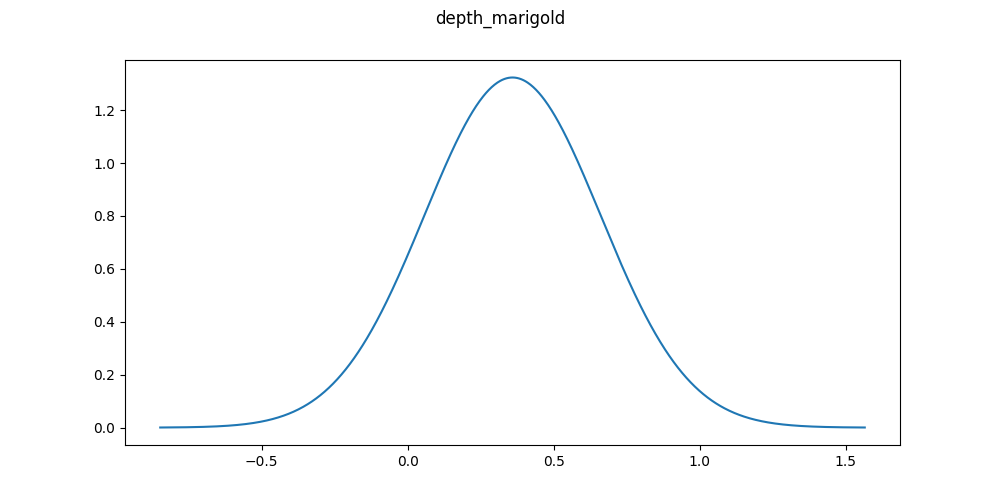

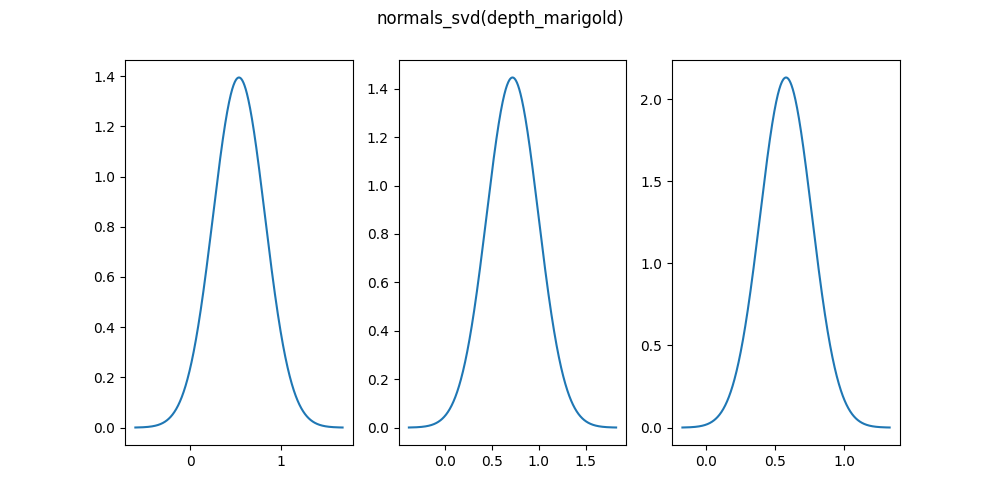

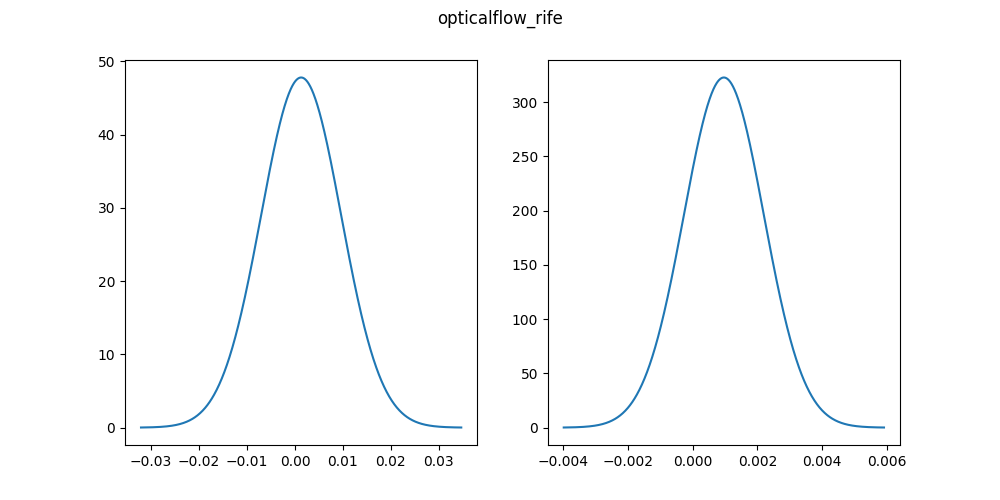

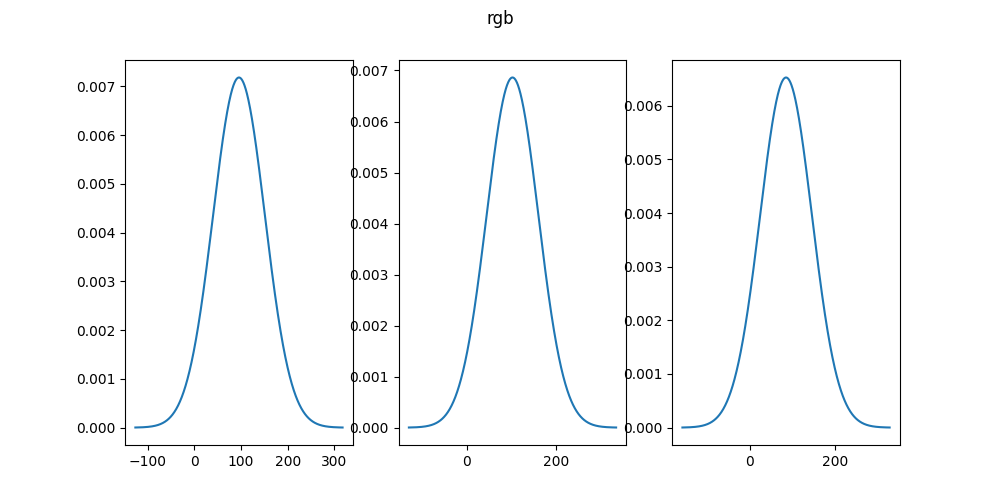

Written html at 'plot.html'


In [5]:

regression_tasks = [t for t in reader.tasks if t not in reader.classification_tasks]
for regression_task in regression_tasks:
    fig = gaussian_from_statistics(reader, regression_task)
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

save_html(imgsrcs, str(reader), "plot.html")
